<a href="https://colab.research.google.com/github/cccg8105/notebook_AD/blob/master/template%20Series%20temporales/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo autoregresivo integrado de medias móviles

Permite modelar problemas de series no estacionarias:

$$ \Delta X_{t} = \varphi_{1} \Delta X_{t-1}+\vartheta_{1}\varepsilon_{t-1} + \varepsilon_{t} + C$$
$$ \Delta X_{t} = X_{t} - X_{t-1}$$
ARIMA(p, d, q)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2 
from math import sqrt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")
sns.set()

#Prueba Logverosimilitud
# requiere que los modelos esten anidados
# p1 + q1 > p2 +q2
# p1 >= p2
# q1 >= q2
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.llf
    L2 = mod_2.llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

# carga de archivo
raw_csv_data = pd.read_csv("https://raw.githubusercontent.com/cccg8105/curso-series-temporales/master/7.%20ARMA%20autorregresivos%20de%20medias%20moviles/Python/Index2018.csv")
dateColumnName = "date"
analizedValue = "ftse"
unused_columns = ['spx','dax','ftse','nikkei']

nroRetrasos = 40
ratioConfianza = 0.95

# Formateo de dataset
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp[dateColumnName], dayfirst = True)
df_comp.set_index(dateColumnName, inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')
df_comp['analizedValue']=df_comp[analizedValue]


df_comp = df_comp.drop(unused_columns, axis=1)
# data frame para analizar
df_comp.head(5)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


         date     spx      dax     ftse    nikkei
0  07/01/1994  469.90  2224.95  3445.98  18124.01
1  10/01/1994  475.27  2225.00  3440.58  18443.44
2  11/01/1994  474.13  2228.10  3413.77  18485.25
3  12/01/1994  474.17  2182.06  3372.02  18793.88
4  13/01/1994  472.47  2142.37  3360.01  18577.26


,analizedValue
date,
1994-01-07,3445.98
1994-01-10,3440.58
1994-01-11,3413.77
1994-01-12,3372.02
1994-01-13,3360.01


### Separación datos de entrenamiento y prueba

In [2]:
porcentajeEntrenamiento = 0.8
size = int(len(df_comp)*porcentajeEntrenamiento)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]
df['returns'] = df.analizedValue.pct_change(1)*100

## Serie temporal

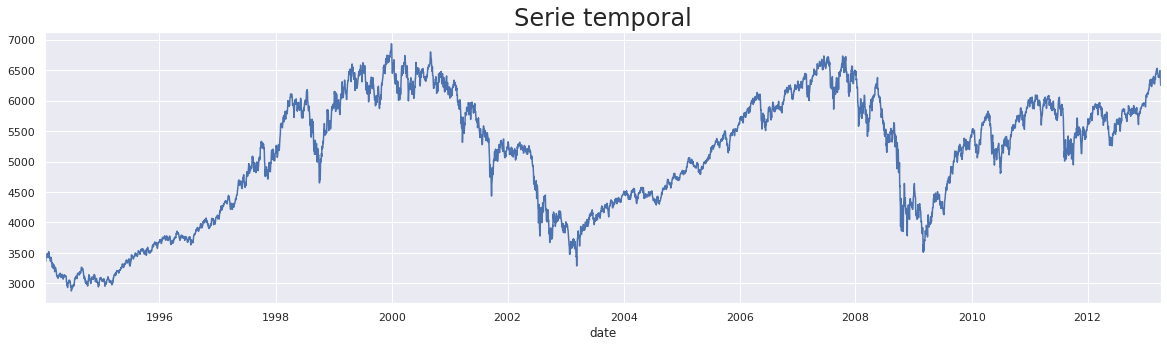

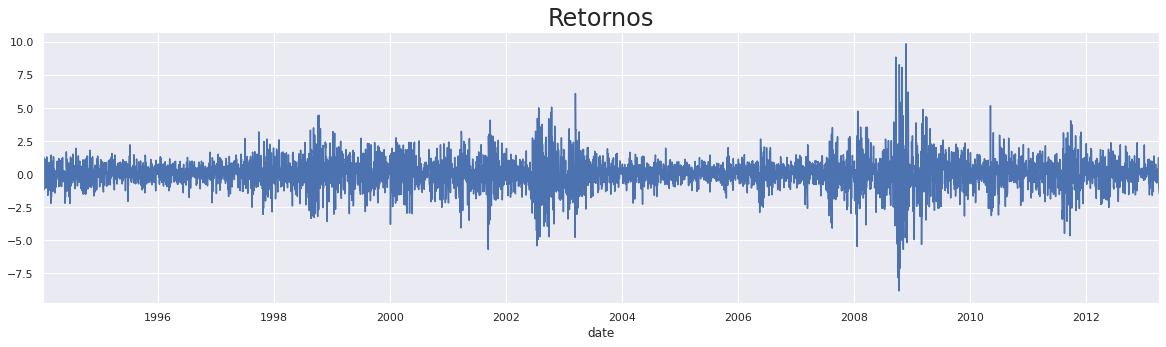

In [5]:
df['analizedValue'].plot(figsize = (20,5))
plt.title("Serie temporal", size= 24)
plt.show()

df['returns'].plot(figsize = (20,5))
plt.title("Retornos", size= 24)
plt.show()

## ARIMA(1, 1, 1)

In [ ]:
model_ar_1_i_1_ma_1 = ARIMA(df.analizedValue, order=(1,1,1))
results_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()
results_ar_1_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D.analizedValue   No. Observations:                 5020
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27603.666
Method:                       css-mle   S.D. of innovations             59.134
Date:                Sat, 14 Nov 2020   AIC                          55215.333
Time:                        23:58:24   BIC                          55241.418
Sample:                    01-10-1994   HQIC                         55224.473
                         - 04-05-2013                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.5655      0.682      0.829      0.407      -0.772       1.903
ar.L1.D.analizedValue     0.7475      0.070     10.652      0.000       0.610       0.885
ma.L1.D.analizedValue    -0.7936      0.064    -12.378      0.000      -0.919      -0.668
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3378           +0.0000j            1.3378            0.0000
MA.1            1.2601           +0.0000j            1.2601            0.0000
-----------------------------------------------------------------------------
"""

### Analisis de residuos

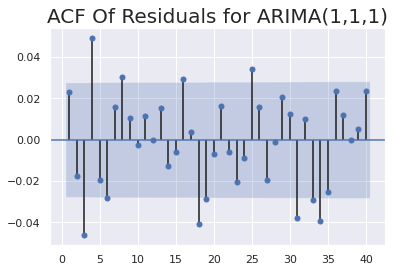

In [ ]:
df['res_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid
sgt.plot_acf(df.res_ar_1_i_1_ma_1[1:], zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(1,1,1)",size=20)
plt.show()

## ARIMA(p, d, q)

In [ ]:
model_ar_1_i_1_ma_2 = ARIMA(df.analizedValue, order=(1,1,2))
results_ar_1_i_1_ma_2 = model_ar_1_i_1_ma_2.fit()
model_ar_1_i_1_ma_3 = ARIMA(df.analizedValue, order=(1,1,3))
results_ar_1_i_1_ma_3 = model_ar_1_i_1_ma_3.fit()
model_ar_2_i_1_ma_1 = ARIMA(df.analizedValue, order=(2,1,1))
results_ar_2_i_1_ma_1 = model_ar_2_i_1_ma_1.fit()
model_ar_3_i_1_ma_1 = ARIMA(df.analizedValue, order=(3,1,1))
results_ar_3_i_1_ma_1 = model_ar_3_i_1_ma_1.fit()
model_ar_3_i_1_ma_2 = ARIMA(df.analizedValue, order=(3,1,2))
results_ar_3_i_1_ma_2 = model_ar_3_i_1_ma_2.fit(start_ar_lags=5)

In [ ]:
print("ARIMA(1,1,1):  \t LL = ", results_ar_1_i_1_ma_1.llf, "\t AIC = ", results_ar_1_i_1_ma_1.aic)
print("ARIMA(1,1,2):  \t LL = ", results_ar_1_i_1_ma_2.llf, "\t AIC = ", results_ar_1_i_1_ma_2.aic)
print("ARIMA(1,1,3):  \t LL = ", results_ar_1_i_1_ma_3.llf, "\t AIC = ", results_ar_1_i_1_ma_3.aic)
print("ARIMA(2,1,1):  \t LL = ", results_ar_2_i_1_ma_1.llf, "\t AIC = ", results_ar_2_i_1_ma_1.aic)
print("ARIMA(3,1,1):  \t LL = ", results_ar_3_i_1_ma_1.llf, "\t AIC = ", results_ar_3_i_1_ma_1.aic)
print("ARIMA(3,1,2):  \t LL = ", results_ar_3_i_1_ma_2.llf, "\t AIC = ", results_ar_3_i_1_ma_2.aic)

ARIMA(1,1,1):  	 LL =  -27603.666412765342 	 AIC =  55215.332825530684
ARIMA(1,1,2):  	 LL =  -27600.081863115072 	 AIC =  55210.163726230145
ARIMA(1,1,3):  	 LL =  -27590.424032512823 	 AIC =  55192.848065025646
ARIMA(2,1,1):  	 LL =  -27599.807487862716 	 AIC =  55209.61497572543
ARIMA(3,1,1):  	 LL =  -27592.05537171564 	 AIC =  55196.11074343128
ARIMA(3,1,2):  	 LL =  -27590.660808971894 	 AIC =  55195.32161794379


In [ ]:
print("\nLLR test p-value = " + str(LLR_test(results_ar_1_i_1_ma_2, results_ar_1_i_1_ma_3)))
print("\nLLR test p-value = " + str(LLR_test(results_ar_1_i_1_ma_1, results_ar_1_i_1_ma_3, DF = 2)))


LLR test p-value = 0.0

LLR test p-value = 0.0


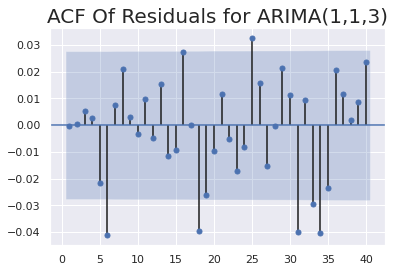

In [ ]:
df['res_ar_1_i_1_ma_3'] = results_ar_1_i_1_ma_3.resid
sgt.plot_acf(df.res_ar_1_i_1_ma_3[1:], zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(1,1,3)", size=20)
plt.show()

## Evaluar interaciones

In [ ]:
df['delta']=df.analizedValue.diff(1)
# verificar si la serie integrada es estacionaria
sts.adfuller(df.delta[1:])
# como el p valor es 0, la serie es estacionaria

(-32.244093495707475,
 0.0,
 5,
 5014,
 {'1%': -3.4316548765428174,
  '10%': -2.5670769326348926,
  '5%': -2.8621166146845334},
 54845.96104221891)

## ARIMAX

$$ \Delta X_{t} = \beta Y + \varphi_{1} \Delta X_{t-1}+\vartheta_{1}\varepsilon_{t-1} + \varepsilon_{t} + C$$
$$ \Delta X_{t} = X_{t} - X_{t-1}$$

Se agrega una serie $Y$ a la ecuación con un nuevo coeficiente $\beta$ que representa el grado de significancia con la serie a evaluar.

### Carga de datos

In [8]:
dateColumnName = "date"
analizedValue = "ftse"
variablesExogenas = ['spx','dax','nikkei']

# Formateo de dataset
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp[dateColumnName], dayfirst = True)
df_comp.set_index(dateColumnName, inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')
df_comp['analizedValue']=df_comp[analizedValue]

dfExog = df_comp[variablesExogenas]

# Se eliminan columnas no usadas
df_comp = df_comp.drop(unused_columns, axis=1)

,spx,dax,nikkei
date,,,
1994-01-07,469.90,2224.95,18124.01
1994-01-10,475.27,2225.00,18443.44
1994-01-11,474.13,2228.10,18485.25
1994-01-12,474.17,2182.06,18793.88
1994-01-13,472.47,2142.37,18577.26


### Separación entrenamiento y datos de prueba

In [9]:
porcentajeEntrenamiento = 0.8
size = int(len(df_comp)*porcentajeEntrenamiento)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]
dfex, dfex_test = dfExog.iloc[:size], dfExog.iloc[size:]
df['returns'] = df.analizedValue.pct_change(1)*100

In [10]:
model_ar_1_i_1_ma_1_Xspx = ARIMA(df.analizedValue, exog = dfex, order=(1,1,1))
results_ar_1_i_1_ma_1_Xspx = model_ar_1_i_1_ma_1_Xspx.fit()
results_ar_1_i_1_ma_1_Xspx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D.analizedValue   No. Observations:                 5020
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27602.532
Method:                       css-mle   S.D. of innovations             59.120
Date:                Mon, 16 Nov 2020   AIC                          55219.064
Time:                        14:19:51   BIC                          55264.712
Sample:                    01-10-1994   HQIC                         55235.060
                         - 04-05-2013                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -3.4005      4.310     -0.789      0.430     -11.848       5.047
spx                       0.0088      0.006      1.471      0.141      -0.003       0.020
dax                      -0.0014      0.001     -1.352      0.176      -0.003       0.001
nikkei                  8.56e-05      0.000      0.483      0.629      -0.000       0.000
ar.L1.D.analizedValue     0.7494      0.070     10.639      0.000       0.611       0.887
ma.L1.D.analizedValue    -0.7960      0.064    -12.380      0.000      -0.922      -0.670
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3345           +0.0000j            1.3345            0.0000
MA.1            1.2563           +0.0000j            1.2563            0.0000
-----------------------------------------------------------------------------
"""